# Observations and Insights 

* Observations found after the filtering process and different analyticals approaches, we can conclude that the Drug Regimen most succesful are Capomulin and Ramicane.
* Capomulin has a Tumor Volume average of 40.676 mm3 while Ramicane has 40.217 mm3. 
* The total amount of mice used on the experiment was 248 where 49.60% are Female and 50.40% are Male
* The Drug Regimen Infubinol, has an lower bound at 36.83 and an upper bound at 82.74 and it has possible outliers at 36.3213458
* The Drug Regimen Ceftamin, has an lower bound at 25.36 and an upper bound at 87.67 and has no outliers
* The Drug Regimen Ramicane, has an lower bound at 17.91 and an upper bound at 54.31 and has no outliers
* The Drug Regimen Capomulin, has an lower bound at 20.7 and an upper bound at 51.83 and has no outliers
* After creating a regression line for Capomulin Regimen based on Average Tumor Volume vs. Weight, shown that the heavier the mouse, the bigger average tumor volume has. However, after randomly selecting a mouse from Capomulin Regimen, we observed that they always have a decline on tumor volume over time points.

* Regression line --> y = 0.95x + 21.55

# Dependencies and Set Up

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata,how='outer',on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_number = mouse_metadata['Mouse ID'].count()
print(f'The number of mices found are: {mouse_number}')

The number of mices found are: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_ID = duplicate_mice.drop_duplicates()
clean_data = combined_data.loc[combined_data['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data['Mouse ID'].nunique()
print(f'The number of mice in the clean DataFrame is: {number_of_mice}')

The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug = clean_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame()
summary_stats['Mean Tumor Volume'] = grouped_drug['Tumor Volume (mm3)'].mean().round(3)
summary_stats['Median'] = grouped_drug['Tumor Volume (mm3)'].median().round(3)
summary_stats['Variance'] = grouped_drug['Tumor Volume (mm3)'].var().round(3)
summary_stats['STD Deviation'] = grouped_drug['Tumor Volume (mm3)'].std().round(3)
summary_stats['STD Error of Mean'] = grouped_drug['Tumor Volume (mm3)'].sem().round(3)
summary_stats

,Mean Tumor Volume,Median,Variance,STD Deviation,STD Error of Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_aggr = grouped_drug.agg({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
summary_table_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

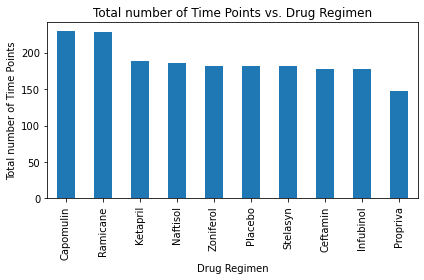

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timePoints = clean_data['Drug Regimen'].value_counts()
timePoints.plot(kind='bar',title='Total number of Time Points vs. Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of Time Points')
plt.tight_layout()
plt.show()
timePoints

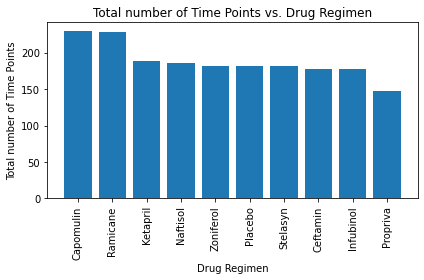

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names_list = ['Capomulin', 'Ramicane','Ketapril', 'Naftisol','Zoniferol','Placebo', 'Stelasyn','Ceftamin', 'Infubinol','Propriva']
time_points = clean_data['Drug Regimen'].value_counts()
plt.bar(drug_names_list,time_points)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of Time Points')
plt.title('Total number of Time Points vs. Drug Regimen')
plt.tight_layout()
plt.show()

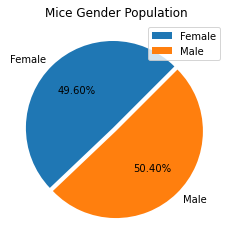

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_data.groupby('Sex')
gender_count = gender_mice['Mouse ID'].nunique()
explode = (0.05,0)
gender_count.plot(kind='pie',explode=explode,startangle=45,autopct="%1.2f%%",legend=gender_mice['Sex'],title='Mice Gender Population',ylabel='')
plt.show()

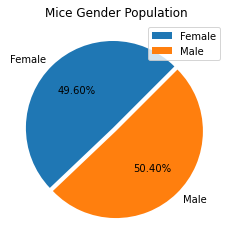

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = clean_data['Sex'].unique().tolist()
plt.pie(gender_count,labels=genders,explode=explode,startangle=45,autopct="%1.2f%%")
plt.legend()
plt.title('Mice Gender Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftami

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_merged = pd.merge(greatest_timepoint,clean_data, how='left',on=['Mouse ID','Timepoint'])

# Filter only the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = final_merged[final_merged['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = filtered_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = filtered_df.loc[filtered_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append Tumor Volume
    tumor_vol_data.append(tumor_vol.unique().tolist())
    
    # Calculate IQR and quintiles
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outlier_occupancy = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print observations and outliers for each drug regimen
    print(f'The Drug Regimen {drug}, has an lower bound at {lower_bound.round(2)} and an upper bound at {upper_bound.round(2)}')
    a = outlier_occupancy.unique()
    if a.size:
        number = ' '.join(map(str,a))
        print(f' and it has possible outliers at {number}')
    else:
        print(' and has no outliers')

The Drug Regimen Infubinol, has an lower bound at 36.83 and an upper bound at 82.74
 and it has possible outliers at 36.3213458
The Drug Regimen Ceftamin, has an lower bound at 25.36 and an upper bound at 87.67
 and has no outliers
The Drug Regimen Ramicane, has an lower bound at 17.91 and an upper bound at 54.31
 and has no outliers
The Drug Regimen Capomulin, has an lower bound at 20.7 and an upper bound at 51.83
 and has no outliers


<ipython-input-16-d946ce1f1dc1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments_list)


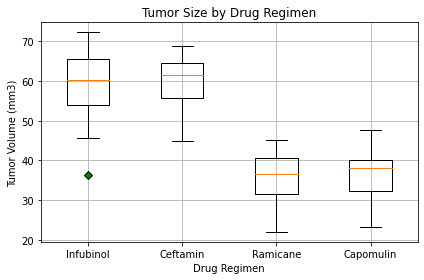

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_label('Final Tumor Volume')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments_list)
ax.set_xlabel('Drug Regimen')
green_diamond = dict(markerfacecolor='g', marker='D')
ax.boxplot(tumor_vol_data,flierprops= green_diamond)
plt.grid()
plt.title('Tumor Size by Drug Regimen')
plt.tight_layout()
plt.savefig("Images/Tumor Size by Drug Regime.png")

plt.show()

## Line and Scatter Plots

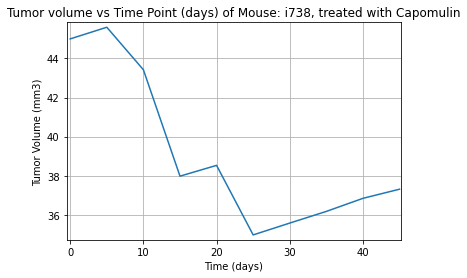

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter data for Capomulin
capomulin_filter = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
mouse_tumorVol_capo = capomulin_filter[['Mouse ID','Timepoint','Tumor Volume (mm3)']].reset_index(drop=True)

# Select a random mouse from the filtered data
number_random = random.randint(0,len(mouse_tumorVol_capo['Mouse ID'])-1)
mouse_name = mouse_tumorVol_capo['Mouse ID'].iloc[number_random]

# Filter the data again for the name of the mouse
mouse_to_plot = mouse_tumorVol_capo[mouse_tumorVol_capo['Mouse ID'] == mouse_name]

# Get values for timepoint and tumor volume
tumor_of_mouse = mouse_to_plot['Tumor Volume (mm3)']
time_point_mouse = mouse_to_plot['Timepoint']

# Generate a line graph and print the name of the mouse
plt.plot(time_point_mouse,tumor_of_mouse)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor volume vs Time Point (days) of Mouse: {mouse_name}, treated with Capomulin')
plt.grid()
plt.xlim(-0.5,time_point_mouse.max()+0.25)
plt.ylim(tumor_of_mouse.min()-0.25,tumor_of_mouse.max()+0.25)
plt.savefig("Images/Tumor volume vs Time Point (days) of Mouse, treated with Capomulin.png")

plt.show()

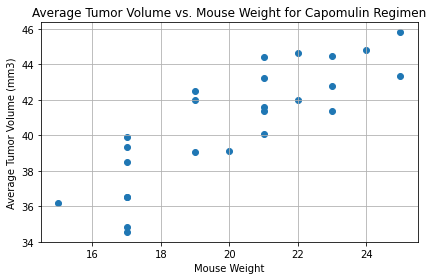

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_ID_group1 = capomulin_filter.groupby('Mouse ID')
average_tumor_vol = mouse_ID_group1['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_ID_group1['Weight (g)'].unique()
plt.scatter(mouse_weight,average_tumor_vol)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.grid()
plt.tight_layout()
plt.savefig("Images/Average Tumor Volume vs. Mouse Weight for Capomulin Regimen.png")

plt.show()

## Correlation and Regression

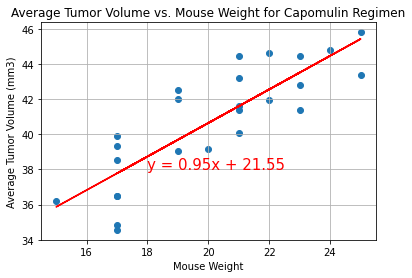

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
max_mouse_weight = mouse_ID_group1['Weight (g)'].max()

slope, intercept, r, _, _ = st.linregress(max_mouse_weight,average_tumor_vol)
regress_line = slope*max_mouse_weight+intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(max_mouse_weight,average_tumor_vol)
plt.plot(max_mouse_weight,regress_line,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")

plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.grid()
plt.savefig("Images/Average Tumor Volume vs. Mouse Weight for Capomulin Regimen.png")

plt.show()